In [1]:
from numpy import reshape
import seaborn as sns
import pandas as pd  
import torch
from os import listdir
from os.path import isfile, join
from tqdm import tqdm

/home/phucdt/anaconda3/envs/py37/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
df = pd.read_csv('./asvspoof2021/eval-package/keys/DF/CM/trial_metadata.txt', sep=' ')
# df.columns = ["sid", "utt", "codec", "src", "attack", "class", "silence", "subset", "vocoder", "source_detail_1", "source_detail_2", "source_detail_3","source_detail_4"]
df.columns = ['speaker', "utt", 'compr', 'source', 'attack', 'label', 'trim', 'subset', 'vocoder', 'task', 'team', 'gender-pair', 'language']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611828 entries, 0 to 611827
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   speaker      611828 non-null  object
 1   utt          611828 non-null  object
 2   compr        611828 non-null  object
 3   source       611828 non-null  object
 4   attack       611828 non-null  object
 5   label        611828 non-null  object
 6   trim         611828 non-null  object
 7   subset       611828 non-null  object
 8   vocoder      611828 non-null  object
 9   task         611828 non-null  object
 10  team         611828 non-null  object
 11  gender-pair  611828 non-null  object
 12  language     611828 non-null  object
dtypes: object(13)
memory usage: 60.7+ MB


In [11]:
# list all attack type
pd.unique(df["attack"])


array(['Task1-team20', 'Task2-team12', 'A09', 'A12', 'SPO-N12', 'A10',
       'Task2-team29', 'SPO-B01', 'HUB-N06', 'Task1-team09', 'SPO-N10',
       '-', 'A17', 'Task1-team11', 'A18', 'HUB-N12', 'Task2-team16',
       'SPO-N11', 'Task1-team18', 'A08', 'Task1-team33', 'HUB-D04',
       'Task2-team24', 'Task2-team07', 'Task2-team02', 'HUB-N11', 'A11',
       'SPO-N03', 'HUB-N10', 'Task2-team09', 'HUB-N18', 'Task1-team19',
       'A19', 'A16', 'Task1-team23', 'SPO-N18', 'SPO-N06', 'Task1-team27',
       'Task2-team11', 'SPO-N13', 'Task1-team12', 'HUB-D02', 'A13',
       'HUB-D03', 'Task2-team13', 'HUB-N20', 'Task1-team07', 'SPO-N05',
       'HUB-N16', 'HUB-N08', 'Task1-team01', 'A07', 'HUB-N07',
       'Task2-team22', 'Task1-team21', 'HUB-N15', 'Task2-team19',
       'Task2-team20', 'Task2-team31', 'HUB-N17', 'Task1-team02',
       'Task1-team25', 'Task1-team29', 'Task2-team05', 'HUB-D01',
       'Task1-team28', 'SPO-N04', 'Task1-team04', 'Task2-team08',
       'Task1-team08', 'Task1-tea

In [12]:
pd.unique(df["source"])

array(['vcc2020', 'asvspoof', 'vcc2018'], dtype=object)

In [3]:
mypath = "./asvspoof2021/LA/Baseline-RawNet2-bio/feats/eval_2021/"
onlyfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and "DF_E" in f)] #LA_E
feat = pd.DataFrame()
# feat.columns = ["utt", "feats"]

for f in tqdm(onlyfiles):
    # print(f)
    bio_inp = torch.load(join(mypath, f)).cpu().detach().numpy()
    feat = feat.append({"utt": f, "feats": bio_inp}, ignore_index=True)
    # print(bio_inp)
    
# feat.head()


 10%|▉         | 4812/50224 [01:58<20:02, 37.75it/s]  

In [5]:
full = df.join(feat.set_index('utt'), on="utt")
tts_full_train = full.loc[~full["attack"].str.contains("A05") & ~full["attack"].str.contains("A06")]
tts_full_train.head()

,sid,utt,phy,attack,class,feats
0,LA_0014,LA_E_8877452,-,A14,spoof,NaN
1,LA_0040,LA_E_6828287,-,A16,spoof,NaN
2,LA_0022,LA_E_6977360,-,A09,spoof,NaN
3,LA_0031,LA_E_5932896,-,A13,spoof,NaN
4,LA_0030,LA_E_5849185,-,-,bonafide,NaN


In [13]:
df = pd.read_csv('/root/dataset/ASVspoof/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt', sep=' ')
df.columns = ["sid", "utt", "phy", "attack", "class"]
full = df.join(feat.set_index('utt'), on="utt")
full.info()
tts_full_train = full.loc[~full["attack"].str.contains("A05") & ~full["attack"].str.contains("A06")]
tts_full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25379 entries, 0 to 25378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sid     25379 non-null  object
 1   utt     25379 non-null  object
 2   phy     25379 non-null  object
 3   attack  25379 non-null  object
 4   class   25379 non-null  object
 5   feats   25379 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17779 entries, 0 to 17778
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sid     17779 non-null  object
 1   utt     17779 non-null  object
 2   phy     17779 non-null  object
 3   attack  17779 non-null  object
 4   class   17779 non-null  object
 5   feats   17779 non-null  object
dtypes: object(6)
memory usage: 972.3+ KB


In [14]:
df = pd.read_csv('/root/dataset/ASVspoof/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt', sep=' ')
df.columns = ["sid", "utt", "phy", "attack", "class"]
full = df.join(feat.set_index('utt'), on="utt")
full.info()
tts_full_dev = full.loc[~full["attack"].str.contains("A05") & ~full["attack"].str.contains("A06")]
tts_full_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24843 entries, 0 to 24842
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sid     24843 non-null  object
 1   utt     24843 non-null  object
 2   phy     24843 non-null  object
 3   attack  24843 non-null  object
 4   class   24843 non-null  object
 5   feats   24843 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17411 entries, 0 to 17410
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sid     17411 non-null  object
 1   utt     17411 non-null  object
 2   phy     17411 non-null  object
 3   attack  17411 non-null  object
 4   class   17411 non-null  object
 5   feats   17411 non-null  object
dtypes: object(6)
memory usage: 952.2+ KB


In [39]:
tts_full_dev.head()

,sid,utt,phy,attack,class,feats
0,LA_0069,LA_D_1105538,-,-,bonafide,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,LA_0069,LA_D_1125976,-,-,bonafide,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,LA_0069,LA_D_1293230,-,-,bonafide,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,LA_0069,LA_D_1340209,-,-,bonafide,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,LA_0069,LA_D_1376638,-,-,bonafide,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [30]:
x = tts_full_dev["feats"].to_numpy()
y = tts_full_dev["class"].to_list()
y = tts_full_dev["attack"].replace("A05", "VC").replace("A06", "VC").replace("A01", "TTS").replace("A02", "TTS").replace("A03", "TTS").replace("A04", "TTS").replace("-","bonafide")

tsne = TSNE(n_components=2, verbose=1, random_state=123)
# tsne = TSNE(n_components=2, perplexity=15, learning_rate=10)
z = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17411 samples in 0.454s...
[t-SNE] Computed neighbors for 17411 samples in 142.630s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17411
[t-SNE] Computed conditional probabilities for sample 2000 / 17411
[t-SNE] Computed conditional probabilities for sample 3000 / 17411
[t-SNE] Computed conditional probabilities for sample 4000 / 17411
[t-SNE] Computed conditional probabilities for sample 5000 / 17411
[t-SNE] Computed conditional probabilities for sample 6000 / 17411
[t-SNE] Computed conditional probabilities for sample 7000 / 17411
[t-SNE] Computed conditional probabilities for sample 8000 / 17411
[t-SNE] Computed conditional probabilities for sample 9000 / 17411
[t-SNE] Computed conditional probabilities for sample 10000 / 17411
[t-SNE] Computed conditional probabilities for sample 11000 / 17411
[t-SNE] Computed conditional probabilities for sample 12000 / 17411
[t-SNE] Computed conditional probabilities for s

In [ ]:
x

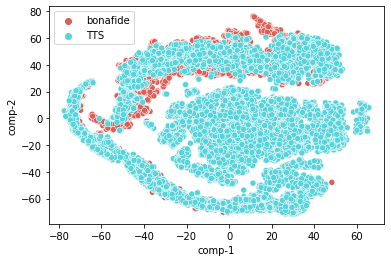

In [23]:
dff = pd.DataFrame()
dff["y"] = y
dff["comp-1"] = z[:,0]l
dff["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dff.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=dff).set(title="") 
plt.savefig('tts_and_bonafide_dev_2019.png',dpi=600)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)


In [ ]:
dev_train = tts_full_train.append(tts_full_dev)
X = dev_train['feats'].to_list()
Y = dev_train['class'].to_numpy()
clf.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
X_test = tts_full_dev['feats'].to_list()
Y_test = tts_full_dev['class'].to_numpy()
clf.score(X_test, Y_test)

1.0

In [ ]:
mypath = "/root/biological/asvspoof2021/LA/Baseline-RawNet2-bio/feats/eval_2019/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
df = pd.read_csv('/root/dataset/ASVspoof/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt', sep=' ')
df.columns = ["sid", "utt", "phy", "attack", "class"]
feat = pd.DataFrame()
# feat.columns = ["utt", "feats"]

for f in tqdm(onlyfiles):
    # print(f)
    bio_inp = torch.load(join(mypath, f)).cpu().detach().numpy()
    feat = feat.append({"utt": f, "feats": bio_inp}, ignore_index=True)
    # print(bio_inp)
    
feat.head()
full = df.join(feat.set_index('utt'), on="utt")

100%|██████████| 71237/71237 [04:09<00:00, 285.60it/s]


In [84]:
tts_full = full.loc[~full["attack"].str.contains("A17") & ~full["attack"].str.contains("A18") & ~full["attack"].str.contains("A19")]
tts_full.head()
X_eval = tts_full['feats'].to_list()
Y_eval = tts_full['class'].to_numpy()
clf.score(X_eval, Y_eval)


0.9895210110808227

In [96]:
# write score to file:
sco = clf.predict_log_proba(tts_full['feats'].to_list())
i=0
with open("/root/biological/bio_ML_2019.txt", "a+") as f:
    for index, row in tqdm(tts_full.iterrows()):
        key = row['class']
        utt = row['utt']
        src = row['attack']
        # sco = clf.predict_log_proba([row['feats']])
        f.write("{} {} {} {}\n".format(utt, src, key, sco[i][0]))
        i=i+1
f.close()

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:704: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)



0it [00:00, ?it/s]


811it [00:00, 8109.95it/s]


1763it [00:00, 8485.95it/s]


2348it [00:00, 7474.87it/s]


3291it [00:00, 7968.87it/s]


4073it [00:00, 7921.56it/s]


4860it [00:00, 7905.45it/s]


5617it [00:00, 7800.43it/s]


6559it [00:00, 8223.97it/s]


7500it [00:00, 8546.35it/s]


8444it [00:01, 8794.81it/s]


9389it [00:01, 8980.65it/s]


10280it [00:01, 8625.32it/s]


11141it [00:01, 8248.10it/s]


12077it [00:01, 8551.53it/s]


12937it [00:01, 8252.47it/s]


13768it [00:01, 8102.03it/s]


14583it [00:01, 7378.75it/s]


15337it [00:02, 4756.05it/s]


15943it [00:02, 3719.08it/s]


16441it [00:02, 3256.52it/s]


16866it [00:02, 3145.22it/s]


17485it [00:02, 3689.35it/s]


18455it [00:02, 4531.37it/s]


19129it [00:02, 5024.07it/s]


20073it [00:03, 5844.19it/s]


20796it [00:03, 5942.01it/s]


21488it [00:03, 6151.39it/s]


22410i

# SVM

In [100]:
from sklearn import svm
scl = svm.SVC(probability=True)
scl.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [101]:
scl.score(X_eval, Y_eval)

0.9861047190852126

In [102]:
# write score to file:
sco = scl.predict_log_proba(tts_full['feats'].to_list())
i=0
with open("/root/biological/bio_ML_svm_2019.txt", "a+") as f:
    for index, row in tqdm(tts_full.iterrows()):
        key = row['class']
        utt = row['utt']
        src = row['attack']
        # sco = clf.predict_log_proba([row['feats']])
        f.write("{} {} {} {}\n".format(utt, src, key, sco[i][0]))
        i=i+1
f.close()




0it [00:00, ?it/s]


927it [00:00, 9266.01it/s]


1375it [00:00, 7004.33it/s]


1704it [00:00, 4073.76it/s]


1996it [00:00, 3537.26it/s]


2484it [00:00, 3854.50it/s]


2858it [00:00, 3816.93it/s]


3580it [00:00, 4445.14it/s]


4552it [00:00, 5309.44it/s]


5527it [00:00, 6148.61it/s]


6494it [00:01, 6902.63it/s]


7467it [00:01, 7561.27it/s]


8317it [00:01, 7404.44it/s]


9124it [00:01, 7441.15it/s]


9915it [00:01, 7441.78it/s]


10692it [00:01, 7451.32it/s]


11475it [00:01, 7560.84it/s]


12400it [00:01, 7998.58it/s]


13219it [00:01, 7892.93it/s]


14022it [00:02, 7761.40it/s]


14808it [00:02, 4861.91it/s]


15436it [00:02, 4753.37it/s]


16099it [00:02, 5194.20it/s]


16864it [00:02, 5747.31it/s]


17532it [00:02, 5997.70it/s]


18259it [00:02, 6329.56it/s]


19000it [00:02, 6618.73it/s]


19742it [00:03, 6838.48it/s]


20471it [00:03, 6964.37it/s]


21361it [00:03, 7448.97it/s]


22282it [00:03, 7901.35it/s]


23096it [00:03, 7804.45it/s]


23893it [00:03, 7408.33it/s]

